# Potential Areas for a Medical Center in Los Angeles County

## Introduction

Los Angeles has a rising health problem among its residents. This report will explore the areas in which medical centers are scarce. This finding will be useful for entrepreneurs who are looking to open a medical center in the Los Angeles county.

# Data

- Quick facts from US Census
- LA Times API for LA Cities spatial data (json file)
- The coordinates of all cities in California (and the world) were retrieved from https://simplemaps.com/data/us-cities
- California Hospital Association for list of health facilities in California
- Foursquare API for top venues in each candidate area

# Methodology

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import types
import csv

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [3]:
import json
from folium import plugins
from pandas.io.json import json_normalize

In [4]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          91 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-1.20.0         | 57 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


### Retrieving the Json file from the LA Times's Database

Retrieving and assigning a name to the Json file

In [5]:
!wget --quiet http://boundaries.latimes.com/1.0/boundary-set/la-county-neighborhoods-current/?format=geojson -O losangeles.json

### Using Google Maps API Geocoder to get the coordinates of Los Angeles

In [6]:
address = 'Los Angeles, California'

geolocator = Nominatim(user_agent="us_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geograpical coordinate of Los Angeles are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Los Angeles are 34.0536909, -118.2427666.


### Retrieving the list of healthcare providers in LA County from California Hospital Association

In [7]:
df=pd.read_html('https://www.calhospital.org/member-hospitals', header=0)[0] #appending the data from the html into a pandas dataframe
df.head()

,Name,City,System
0,Acadia Healthcare,Franklin,NaN
1,Adventist Health,Roseville,NaN
2,Adventist Health and Rideout,Marysville,Adventist Health
3,Adventist Health Bakersfield,Bakersfield,Adventist Health
4,Adventist Health Clear Lake,Clearlake,Adventist Health


### Data Cleanup

California Hospital Association lists the names of all hospitals in California. It includes the 'system' or authority of each facility, which is not needed. 

In [8]:
df.drop(df.columns[[2]], axis=1, inplace=True) #dropping unwanted columns
df.head()

,Name,City
0,Acadia Healthcare,Franklin
1,Adventist Health,Roseville
2,Adventist Health and Rideout,Marysville
3,Adventist Health Bakersfield,Bakersfield
4,Adventist Health Clear Lake,Clearlake


In [9]:
df.rename(columns={"Name":"Facility Name"}, inplace=True) #renaming columns
df.head()

,Facility Name,City
0,Acadia Healthcare,Franklin
1,Adventist Health,Roseville
2,Adventist Health and Rideout,Marysville
3,Adventist Health Bakersfield,Bakersfield
4,Adventist Health Clear Lake,Clearlake


In [10]:
df.shape

(491, 2)

There are 491 healthcare facilities in the state of California.

In [11]:
df["City"].unique() #showing the name of each city, ignoring the repeated values

array(['Franklin', 'Roseville', 'Marysville', 'Bakersfield', 'Clearlake',
       'Glendale', 'Hanford', 'Willits', 'Lodi', 'Reedley', 'Selma',
       'Simi Valley', 'Sonora', 'Saint Helena', 'Tehachapi', 'Ukiah',
       'Vallejo', 'Los Angeles', 'Anaheim', 'Alhambra', 'Oakland',
       'Alameda', 'Irvine', 'Berkeley', 'San Diego', 'La Mesa',
       'Lancaster', 'Colton', 'Arroyo Grande', 'Covina', 'Santa Rosa',
       'El Segundo', 'San Bernardino', 'Phoenix', 'Susanville', 'Barstow',
       'South Lake Tahoe', 'Big Bear Lake', 'Montebello', 'Rosemead',
       'San Francisco', 'Chino', 'Pomona', 'Avalon', 'Marina Del Rey',
       'Inglewood', 'Orange', 'Mission Viejo', 'Duarte', 'Clovis',
       'Norwalk', 'Santa Fe Springs', 'Cerritos', 'Costa Mesa',
       'Long Beach', 'Chicago', 'Fresno', 'Huntington Park', 'Monterey',
       'Ventura', 'Martinez', 'Corona', 'Santa Barbara', 'Stockton',
       'Torrance', 'Delano', 'Palm Springs', 'Victorville', 'Manteca',
       'Modesto', 'Santa 

Creating a new column containing the number of facilities in each city. This was done by counting the number of times a city name was repeated, using the 'groupby' function.

In [12]:
df["Count"]=df.groupby("City")["City"].transform('count') #appending the hospital count per city into the dataframe under the column 'Count'
df.groupby("City").count()[["Count"]]
df.head()

,Facility Name,City,Count
0,Acadia Healthcare,Franklin,1
1,Adventist Health,Roseville,3
2,Adventist Health and Rideout,Marysville,1
3,Adventist Health Bakersfield,Bakersfield,9
4,Adventist Health Clear Lake,Clearlake,1


A sample of first 10 rows of the cleaned up dataframe and the facility counts per city.

In [13]:
df.head(10)

,Facility Name,City,Count
0,Acadia Healthcare,Franklin,1
1,Adventist Health,Roseville,3
2,Adventist Health and Rideout,Marysville,1
3,Adventist Health Bakersfield,Bakersfield,9
4,Adventist Health Clear Lake,Clearlake,1
5,Adventist Health Glendale,Glendale,3
6,Adventist Health Hanford,Hanford,1
7,Adventist Health Howard Memorial,Willits,1
8,Adventist Health Lodi Memorial,Lodi,1
9,Adventist Health Reedley,Reedley,1


### Visualizing the data using a Choropleth Map

A choropleth map visualizing areas/cities where hospitals are relatively more abundance (or not so).

In [14]:
la_geo=r'losangeles.json'

la_map=folium.Map(location=[latitude, longitude], zoom_start=10)

la_map.choropleth(
    geo_data=la_geo,
    data=df,
    columns=['City', 'Count'],
    key_on='feature.properties.name',
    fill_color='RdPu', 
    fill_opacity=0.7, 
    line_opacity=0.3,
    legend_name='Healthcare Facilities in Los Angeles County'
)

la_map

### Folium Map of Los Angeles Cities

### Getting a list of LA cities from https://simplemaps.com/data/us-cities

In [17]:
# The code was removed by Watson Studio for sharing.

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


### Cleaning Up

The dataframe contains a lot of unneeded information, including names of cities around the US (this report focuses on Los Angeles County), zip codes, populations, densities, etc. Hence, a simple cleanup is necessary.

In [18]:
#renaming the columns for simplicity
df1.rename(columns={"city":"City", "county_name":"County", "lat":"Latitude", "lng":"Longitude", "admin":"State"}, inplace=True)
df1.head()

,City,city_ascii,state_id,state_name,county_fips,County,county_fips_all,county_name_all,Latitude,Longitude,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840116412
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840097718
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840096300
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840097082
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840116371


In [19]:
df1.shape

(28889, 19)

The dataframe contains 28,889 US cities in total.

### Extracting LA County data

Since the dataframe conveniently contains a 'County' column, extracting LA county's cities can be done easily by appending a selected data into a new dataframe.

In [20]:
df2=df1[df1['County']=='Los Angeles']

In [21]:
df2.head()

,City,city_ascii,state_id,state_name,county_fips,County,county_fips_all,county_name_all,Latitude,Longitude,population,density,source,military,incorporated,timezone,ranking,zips,id
12847,Rowland Heights,Rowland Heights,CA,California,6037,Los Angeles,06037,Los Angeles,33.9716,-117.8911,50572.0,1493.0,polygon,False,False,America/Los_Angeles,3,91748 91789,1840113178
12855,Avocado Heights,Avocado Heights,CA,California,6037,Los Angeles,06037,Los Angeles,34.0381,-118.0026,16213.0,2313.0,polygon,False,False,America/Los_Angeles,2,91746 90601,1840111837
12858,Inglewood,Inglewood,CA,California,6037,Los Angeles,06037,Los Angeles,33.9566,-118.3444,110598.0,4709.0,polygon,False,True,America/Los_Angeles,2,90305 90304 90303 90302 90301 90306 90307 9030...,1840107504
12867,South Whittier,South Whittier,CA,California,6037,Los Angeles,06037,Los Angeles,33.9336,-118.0311,60000.0,4340.0,polygon,False,False,America/Los_Angeles,2,90604 90605,1840112774
12883,Manhattan Beach,Manhattan Beach,CA,California,6037,Los Angeles,06037,Los Angeles,33.8895,-118.3972,35924.0,3522.0,polygon,False,True,America/Los_Angeles,2,90266 90267,1840107591


In [22]:
df2.shape

(140, 19)

There ara a total of 140 cities in Los Angeles County. However, this number contains unincorporated cities as well, so those will have to be taken out.

### Further Cleanup

Further cleaning up of this data includes dropping unnecessary columns and unincorporated cities in LA County.

In [23]:
df2.drop(df2.columns[[1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 15, 16, 17, 18]], axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
df2.head()

,City,County,Latitude,Longitude,incorporated
12847,Rowland Heights,Los Angeles,33.9716,-117.8911,False
12855,Avocado Heights,Los Angeles,34.0381,-118.0026,False
12858,Inglewood,Los Angeles,33.9566,-118.3444,True
12867,South Whittier,Los Angeles,33.9336,-118.0311,False
12883,Manhattan Beach,Los Angeles,33.8895,-118.3972,True


In [25]:
df2.drop(df2[df2['incorporated']==False].index, axis=0, inplace=True)

In [26]:
df2.head()

,City,County,Latitude,Longitude,incorporated
12858,Inglewood,Los Angeles,33.9566,-118.3444,True
12883,Manhattan Beach,Los Angeles,33.8895,-118.3972,True
12885,El Monte,Los Angeles,34.0739,-118.0291,True
12910,Montebello,Los Angeles,34.0155,-118.1108,True
12927,Pico Rivera,Los Angeles,33.9902,-118.0888,True


In [27]:
df2.shape

(100, 5)

There are a total of 100 incorporated cities in LA County.

### Selecting candidate cities

Now that both dataframes containing the necessary information are retrieved and prepped, they can be merged and visualized through a choropleth map. A choropleth map helps users to 'see' the cities where medical centers are abundant by using a gradually dark shade to represent bigger facility counts.

In [28]:
#merging hospitals list onto df2
df3=pd.merge(df, df2, on="City", how="outer")
df3.head()

,Facility Name,City,Count,County,Latitude,Longitude,incorporated
0,Acadia Healthcare,Franklin,1.0,NaN,NaN,NaN,NaN
1,Adventist Health,Roseville,3.0,NaN,NaN,NaN,NaN
2,Kaiser Permanente Roseville Medical Center,Roseville,3.0,NaN,NaN,NaN,NaN
3,Sutter Roseville Medical Center,Roseville,3.0,NaN,NaN,NaN,NaN
4,Adventist Health and Rideout,Marysville,1.0,NaN,NaN,NaN,NaN


Merging the dataframes on the 'outer' preserves all data by filling empty spaces with 'NaN.' By doing so, cities with no medical facilities will not be dropped from the merged dataframe.

As mentioned earlier, the California Hospital Association contains an inclusive list of all facilities in California. However, since df2 only contains the coordinates of cities in Los Angeles, the cities outside of LA will show an 'NaN' in the 'Latitude' and 'Longitude' cells in the merged dataframe. Once again, these rows containing 'NaN' coordinates can be conveniently dropped (hence dropping unwanted cities) from the data.

In [29]:
#drop rows containing 'NaN' values
df3.dropna(subset=['Latitude'], inplace=True)
df3.head()

,Facility Name,City,Count,County,Latitude,Longitude,incorporated
15,Adventist Health Glendale,Glendale,3.0,Los Angeles,34.1818,-118.2468,True
16,Glendale Memorial Hospital and Health Center,Glendale,3.0,Los Angeles,34.1818,-118.2468,True
17,USC Verdugo Hills Hospital,Glendale,3.0,Los Angeles,34.1818,-118.2468,True
33,Adventist Health White Memorial,Los Angeles,31.0,Los Angeles,34.1139,-118.4068,True
34,Barlow Respiratory Hospital,Los Angeles,31.0,Los Angeles,34.1139,-118.4068,True


In [30]:
#deleting unwanted columns
df3.drop(df3.columns[[2, 6]], axis=1, inplace=True)

In [31]:
df3.head()

,Facility Name,City,County,Latitude,Longitude
15,Adventist Health Glendale,Glendale,Los Angeles,34.1818,-118.2468
16,Glendale Memorial Hospital and Health Center,Glendale,Los Angeles,34.1818,-118.2468
17,USC Verdugo Hills Hospital,Glendale,Los Angeles,34.1818,-118.2468
33,Adventist Health White Memorial,Los Angeles,Los Angeles,34.1139,-118.4068
34,Barlow Respiratory Hospital,Los Angeles,Los Angeles,34.1139,-118.4068


In [32]:
df3.shape

(159, 5)

df3 contains 100 cities, all within Los Angeles county, which means that the data is properly cleaned up and ready to be utilized. It is important to note that the total number of cities (rows) in df3 matches the one of df2.

### Further Cleanup

In [33]:
df3["Count"]=df3.groupby("Facility Name")["Facility Name"].transform('count') #appending the hospital count per city into the dataframe under the column 'Count'
df3.groupby("Facility Name").count()[["Count"]]

,Count
Facility Name,
AHMC Healthcare Inc.,1
Adventist Health Glendale,1
Adventist Health White Memorial,1
Alhambra Hospital Medical Center,1
Antelope Valley Hospital,1
Aurora Charter Oak Hospital,1
Avanti Hospitals,1
BHC Alhambra Hospital,1
Barlow Respiratory Hospital,1


In [34]:
df4=df3.reset_index() #resetting index

In [35]:
df4.head()

,index,Facility Name,City,County,Latitude,Longitude,Count
0,15,Adventist Health Glendale,Glendale,Los Angeles,34.1818,-118.2468,1.0
1,16,Glendale Memorial Hospital and Health Center,Glendale,Los Angeles,34.1818,-118.2468,1.0
2,17,USC Verdugo Hills Hospital,Glendale,Los Angeles,34.1818,-118.2468,1.0
3,33,Adventist Health White Memorial,Los Angeles,Los Angeles,34.1139,-118.4068,1.0
4,34,Barlow Respiratory Hospital,Los Angeles,Los Angeles,34.1139,-118.4068,1.0


In [36]:
# fill 'NaN' values in 'Count' column with 0
df4["Count"].fillna(0, inplace=True)

In [37]:
df4.tail(20)

,index,Facility Name,City,County,Latitude,Longitude,Count
139,532,NaN,Cudahy,Los Angeles,33.9631,-118.1830,0.0
140,533,NaN,Palos Verdes Estates,Los Angeles,33.7871,-118.3976,0.0
141,534,NaN,La Verne,Los Angeles,34.1208,-117.7702,0.0
142,535,NaN,San Fernando,Los Angeles,34.2886,-118.4363,0.0
143,536,NaN,South Gate,Los Angeles,33.9448,-118.1926,0.0
144,537,NaN,Walnut,Los Angeles,34.0334,-117.8593,0.0
145,538,NaN,Paramount,Los Angeles,33.8977,-118.1652,0.0
146,539,NaN,Vincent,Los Angeles,34.0982,-117.9238,0.0
147,540,NaN,Malibu,Los Angeles,34.0368,-118.7845,0.0
148,541,NaN,Redondo Beach,Los Angeles,33.8574,-118.3766,0.0


In [38]:
# Deleting the 'Facility Name' column and renaming 'Count' column
df4.drop(df4.columns[[1, 3]], axis=1, inplace=True)
df4.rename(columns={"Count":"Facility Count"}, inplace=True)

In [39]:
df4.head()

,index,City,Latitude,Longitude,Facility Count
0,15,Glendale,34.1818,-118.2468,1.0
1,16,Glendale,34.1818,-118.2468,1.0
2,17,Glendale,34.1818,-118.2468,1.0
3,33,Los Angeles,34.1139,-118.4068,1.0
4,34,Los Angeles,34.1139,-118.4068,1.0


In [40]:
df4.shape

(159, 5)

In [41]:
#dropping duplicate rows
df4.drop_duplicates(['City'], keep='first', inplace=True)

In [42]:
df4

,index,City,Latitude,Longitude,Facility Count
0,15,Glendale,34.1818,-118.2468,1.0
3,33,Los Angeles,34.1139,-118.4068,1.0
34,69,Alhambra,34.0840,-118.1355,1.0
36,105,Lancaster,34.6934,-118.1753,1.0
37,108,Covina,34.0903,-117.8817,1.0
40,116,El Segundo,33.9169,-118.4021,1.0
41,125,Montebello,34.0155,-118.1108,1.0
42,126,Rosemead,34.0688,-118.0823,1.0
43,147,Pomona,34.0585,-117.7626,1.0
45,149,Avalon,33.3342,-118.3315,1.0


In [43]:
df4.shape

(100, 5)

df4 now contains a list of cities with 0 facility counts.

### List of cities within LA County with no health facility

In [44]:
# making a new dataframe with this list
df5=df4[df4["Facility Count"]<1]

In [45]:
print("Number of cities in LA with no medical facility: ", df5["City"].count())

Number of cities in LA with no medical facility:  61


In [46]:
#displaying all cities in the list
df5.head(50)

,index,City,Latitude,Longitude,Facility Count
98,491,Manhattan Beach,33.8895,-118.3972,0.0
99,492,El Monte,34.0739,-118.0291,0.0
100,493,Pico Rivera,33.9902,-118.0888,0.0
101,494,La Crescenta-Montrose,34.2323,-118.2353,0.0
102,495,Signal Hill,33.8029,-118.1681,0.0
103,496,Agoura Hills,34.1510,-118.7608,0.0
104,497,Vernon,34.0019,-118.2106,0.0
105,498,Compton,33.8930,-118.2275,0.0
106,499,Rolling Hills,33.7600,-118.3471,0.0
107,500,Rolling Hills Estates,33.7783,-118.3508,0.0


In [47]:
df5.shape

(61, 5)

### Foursquare API

Now that the list of candidate cities are extracted and cleaned up, a Foursquare API is needed to explore those cities. An ideal location for a medical facility should be close to a lot of restaurants (preferably quick ones like fast food chains). This information can be obtained by using Foursquare API to display the most common venues in each candidate city.

In [48]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 03KM0T015RKGIIC5OH30NX5WL1HPALMFUZC4BWRZHEG3QXDK
CLIENT_SECRET:QZTKR2AJBYLPXDEAIE5FIAXE31QEOYG0TRQ34CXZ350HPLVY


### Exploring venues in the candidate cities

Retrieving nearby venues from the candidate cities.

In [49]:
def getNearbyVenues(names, latitudes, longitudes, radius=800, limit=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            limit
        )
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [51]:
candi_venues = getNearbyVenues(names=df5['City'],
                                   latitudes=df5['Latitude'],
                                   longitudes=df5['Longitude']
                                  )

Manhattan Beach
El Monte
Pico Rivera
La Crescenta-Montrose
Signal Hill
Agoura Hills
Vernon
Compton
Rolling Hills
Rolling Hills Estates
Sun Village
Lomita
Elizabeth Lake
Azusa
Calabasas
Carson
San Marino
Rose Hills
Florence-Graham
Hermosa Beach
Artesia
Industry
Beverly Hills
Commerce
Hasley Canyon
Hawthorne
San Pasqual
La Habra Heights
West Whittier-Los Nietos
South Pasadena
Sierra Madre
Bell Gardens
Lawndale
La Cañada Flintridge
Irwindale
West Hollywood
Bell
Stevenson Ranch
South Monrovia Island
La Puente
Bradbury
Cudahy
Palos Verdes Estates
La Verne
San Fernando
South Gate
Walnut
Paramount
Vincent
Malibu
Redondo Beach
Claremont
Santa Clarita
Hidden Hills
View Park-Windsor Hills
Monrovia
Diamond Bar
Hawaiian Gardens
Temple City
Maywood
Rancho Palos Verdes


In [52]:
print(candi_venues.shape)
candi_venues.head()

(1426, 7)


,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan Beach,33.8895,-118.3972,Manhattan House,33.887478,-118.397039,Gastropub
1,Manhattan Beach,33.8895,-118.3972,Barsha Wines & Spirits,33.885295,-118.396195,Wine Bar
2,Manhattan Beach,33.8895,-118.3972,Target,33.888286,-118.394624,Big Box Store
3,Manhattan Beach,33.8895,-118.3972,Rubio's,33.892651,-118.395783,Seafood Restaurant
4,Manhattan Beach,33.8895,-118.3972,Grow - The Produce Shop,33.892042,-118.395740,Gourmet Shop


There are 1426 nearby venues around the candidate cities.

### Analyzing each city

In [53]:
# one hot encoding
candi_onehot = pd.get_dummies(candi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
candi_onehot['City'] = candi_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [candi_onehot.columns[-1]] + list(candi_onehot.columns[:-1])
candi_onehot = candi_onehot[fixed_columns]

candi_onehot.head()

,City,ATM,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Manhattan Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Manhattan Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Manhattan Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Manhattan Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Manhattan Beach,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
candi_onehot.shape

(1426, 227)

In [55]:
candi_grouped = candi_onehot.groupby('City').mean().reset_index()
candi_grouped.head()
candi_grouped["City"].unique()

array(['Agoura Hills', 'Artesia', 'Azusa', 'Bell', 'Bell Gardens',
       'Beverly Hills', 'Bradbury', 'Calabasas', 'Carson', 'Claremont',
       'Commerce', 'Compton', 'Cudahy', 'Diamond Bar', 'El Monte',
       'Elizabeth Lake', 'Florence-Graham', 'Hasley Canyon',
       'Hawaiian Gardens', 'Hawthorne', 'Hermosa Beach', 'Hidden Hills',
       'Industry', 'Irwindale', 'La Cañada Flintridge',
       'La Crescenta-Montrose', 'La Habra Heights', 'La Puente',
       'La Verne', 'Lawndale', 'Lomita', 'Malibu', 'Manhattan Beach',
       'Maywood', 'Monrovia', 'Palos Verdes Estates', 'Paramount',
       'Pico Rivera', 'Rancho Palos Verdes', 'Redondo Beach',
       'Rolling Hills', 'Rolling Hills Estates', 'Rose Hills',
       'San Fernando', 'San Marino', 'San Pasqual', 'Santa Clarita',
       'Sierra Madre', 'Signal Hill', 'South Gate',
       'South Monrovia Island', 'South Pasadena', 'Stevenson Ranch',
       'Sun Village', 'Temple City', 'Vernon', 'View Park-Windsor Hills',
       'Vince

In [56]:
candi_grouped.shape

(61, 227)

### Top 5 Venues in Each City

In [57]:
num_top_venues = 5

for hood in candi_grouped['City']:
    print("----"+hood+"----")
    temp = candi_grouped[candi_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agoura Hills----
                  venue  freq
0  Fast Food Restaurant  0.12
1    Chinese Restaurant  0.06
2         Deli / Bodega  0.06
3              Pharmacy  0.06
4           Coffee Shop  0.04


----Artesia----
                venue  freq
0   Indian Restaurant  0.20
1  Chinese Restaurant  0.07
2   Korean Restaurant  0.06
3       Grocery Store  0.05
4    Asian Restaurant  0.04


----Azusa----
                venue  freq
0  Mexican Restaurant  0.09
1                Bank  0.09
2         Coffee Shop  0.09
3         Pizza Place  0.09
4       Big Box Store  0.09


----Bell----
                venue  freq
0      Discount Store  0.09
1  Mexican Restaurant  0.09
2              Bakery  0.09
3        Burger Joint  0.04
4          Restaurant  0.04


----Bell Gardens----
                 venue  freq
0         Burger Joint  0.17
1  Fried Chicken Joint  0.11
2     Department Store  0.11
3   Mexican Restaurant  0.11
4    Convenience Store  0.11


----Beverly Hills----
                   venue 

In [58]:
# converting the data into a dataframe in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Top 10 Venues in Each City

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
candi_venues_sorted = pd.DataFrame(columns=columns)
candi_venues_sorted['City'] = candi_grouped['City']

for ind in np.arange(candi_grouped.shape[0]):
    candi_venues_sorted.iloc[ind, 1:] = return_most_common_venues(candi_grouped.iloc[ind, :], num_top_venues)

candi_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agoura Hills,Fast Food Restaurant,Chinese Restaurant,Deli / Bodega,Pharmacy,Coffee Shop,Bakery,Bank,Breakfast Spot,Gym,Grocery Store
1,Artesia,Indian Restaurant,Chinese Restaurant,Korean Restaurant,Grocery Store,Asian Restaurant,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Pizza Place,Bank
2,Azusa,Mexican Restaurant,Pizza Place,Coffee Shop,Pharmacy,Big Box Store,Bank,Auto Garage,Thrift / Vintage Store,Park,Sandwich Place
3,Bell,Bakery,Discount Store,Mexican Restaurant,Buffet,South American Restaurant,Food & Drink Shop,Pet Store,Film Studio,Shoe Store,Seafood Restaurant
4,Bell Gardens,Burger Joint,Department Store,Fried Chicken Joint,Convenience Store,Mexican Restaurant,ATM,Clothing Store,Food,Fast Food Restaurant,Liquor Store


In [60]:
candi_venues_sorted.shape

(61, 11)

### Candidate Cities With The Most Restaurants

In [61]:
top_res=candi_venues_sorted[candi_venues_sorted["1st Most Common Venue"].str.contains("Restaurant")]
top_res

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agoura Hills,Fast Food Restaurant,Chinese Restaurant,Deli / Bodega,Pharmacy,Coffee Shop,Bakery,Bank,Breakfast Spot,Gym,Grocery Store
1,Artesia,Indian Restaurant,Chinese Restaurant,Korean Restaurant,Grocery Store,Asian Restaurant,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Pizza Place,Bank
2,Azusa,Mexican Restaurant,Pizza Place,Coffee Shop,Pharmacy,Big Box Store,Bank,Auto Garage,Thrift / Vintage Store,Park,Sandwich Place
11,Compton,Fast Food Restaurant,Pizza Place,Clothing Store,Burger Joint,Grocery Store,Bank,Pharmacy,Department Store,Dessert Shop,Convenience Store
12,Cudahy,Fast Food Restaurant,Sporting Goods Shop,Business Service,Clothing Store,Juice Bar,Donut Shop,Big Box Store,Deli / Bodega,Pizza Place,Home Service
14,El Monte,Fast Food Restaurant,Burger Joint,Grocery Store,Japanese Restaurant,Vietnamese Restaurant,Rental Car Location,Mexican Restaurant,Mobile Phone Shop,Bank,Gym / Fitness Center
18,Hawaiian Gardens,Mexican Restaurant,Baseball Field,Casino,Gym / Fitness Center,Grocery Store,Fast Food Restaurant,Fried Chicken Joint,Liquor Store,Sports Bar,Speakeasy
19,Hawthorne,Fast Food Restaurant,Mobile Phone Shop,Bank,Discount Store,Latin American Restaurant,Pizza Place,Liquor Store,Taco Place,Supplement Shop,Fried Chicken Joint
20,Hermosa Beach,American Restaurant,Hotel,Italian Restaurant,Beach,Board Shop,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Grocery Store,Sushi Restaurant
22,Industry,Mexican Restaurant,Restaurant,Hotel,Golf Course,Snack Place,Nightclub,Market,Resort,Coffee Shop,Automotive Shop


Since the cities on the above dataframe all have a restaurant as their most common venue, they would be best suited for a medical center. La Verne and La Puente would be the best choices since grocery stores are also abundant. The clustering to show the unique characteristics of each candidate city is shown below.

## Clustering the Cities using K-Means

K-Means generates centroids and grouping data points near those centroids based on their similarites. Hence, K-Means will be useful for this report in identifying restaurant-rich clusters.

In [62]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

#### Preparations

Making df5 and candi_grouped have the same number of rows by merging them to drop any city that was not returned by Foursquare API.

In [63]:
#merging the dataframes
df6=pd.merge(df5, candi_grouped, on='City', how='inner')
df6.head()

,index,City,Latitude,Longitude,Facility Count,ATM,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,...,Video Store,Vietnamese Restaurant,Volleyball Court,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,491,Manhattan Beach,33.8895,-118.3972,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.019608,0.000000,0.0,0.000000,0.0,0.019608,0.0,0.0,0.000000,0.0
1,492,El Monte,34.0739,-118.0291,0.0,0.000000,0.023256,0.0,0.0,0.0,...,0.023256,0.046512,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,493,Pico Rivera,33.9902,-118.0888,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,494,La Crescenta-Montrose,34.2323,-118.2353,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,495,Signal Hill,33.8029,-118.1681,0.0,0.020833,0.020833,0.0,0.0,0.0,...,0.020833,0.000000,0.0,0.020833,0.0,0.000000,0.0,0.0,0.020833,0.0


In [64]:
#dropping unwanted columns
df6.drop(df6.iloc[:, 4:231], axis=1, inplace=True)
df6.head()

,index,City,Latitude,Longitude
0,491,Manhattan Beach,33.8895,-118.3972
1,492,El Monte,34.0739,-118.0291
2,493,Pico Rivera,33.9902,-118.0888
3,494,La Crescenta-Montrose,34.2323,-118.2353
4,495,Signal Hill,33.8029,-118.1681


In [65]:
#resetting index
df7=df6.reset_index()

In [66]:
df7.shape

(61, 5)

#### Adding clusters to the dataframe

The data will be divided into 3 clusters since it seems to work best for the data points.

In [67]:
# set number of clusters
kclusters = 3

candi_grouped_clustering = candi_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(candi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels

candi_merged = df7

candi_merged['Cluster Labels'] = kmeans.labels_


# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
candi_merged = candi_merged.join(candi_venues_sorted.set_index('City'), on='City')

candi_merged.head() # check the last columns!

,level_0,index,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,491,Manhattan Beach,33.8895,-118.3972,0,Hotel,Coffee Shop,Sports Bar,Bank,Pilates Studio,Automotive Shop,Health & Beauty Service,Fast Food Restaurant,Cosmetics Shop,Supermarket
1,1,492,El Monte,34.0739,-118.0291,0,Fast Food Restaurant,Burger Joint,Grocery Store,Japanese Restaurant,Vietnamese Restaurant,Rental Car Location,Mexican Restaurant,Mobile Phone Shop,Bank,Gym / Fitness Center
2,2,493,Pico Rivera,33.9902,-118.0888,0,Ice Cream Shop,Arcade,Bubble Tea Shop,Food,Moving Target,Playground,Dim Sum Restaurant,Dessert Shop,Food Court,Food & Drink Shop
3,3,494,La Crescenta-Montrose,34.2323,-118.2353,0,Park,Construction & Landscaping,Coffee Shop,Event Service,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Film Studio
4,4,495,Signal Hill,33.8029,-118.1681,0,Park,Pet Store,Sandwich Place,Gym,Diner,Rental Car Location,Fast Food Restaurant,ATM,Sporting Goods Shop,Lighting Store


In [68]:
candi_merged.drop(candi_merged.columns[0], axis=1, inplace=True)

In [69]:
candi_merged.head()

,index,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,491,Manhattan Beach,33.8895,-118.3972,0,Hotel,Coffee Shop,Sports Bar,Bank,Pilates Studio,Automotive Shop,Health & Beauty Service,Fast Food Restaurant,Cosmetics Shop,Supermarket
1,492,El Monte,34.0739,-118.0291,0,Fast Food Restaurant,Burger Joint,Grocery Store,Japanese Restaurant,Vietnamese Restaurant,Rental Car Location,Mexican Restaurant,Mobile Phone Shop,Bank,Gym / Fitness Center
2,493,Pico Rivera,33.9902,-118.0888,0,Ice Cream Shop,Arcade,Bubble Tea Shop,Food,Moving Target,Playground,Dim Sum Restaurant,Dessert Shop,Food Court,Food & Drink Shop
3,494,La Crescenta-Montrose,34.2323,-118.2353,0,Park,Construction & Landscaping,Coffee Shop,Event Service,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Film Studio
4,495,Signal Hill,33.8029,-118.1681,0,Park,Pet Store,Sandwich Place,Gym,Diner,Rental Car Location,Fast Food Restaurant,ATM,Sporting Goods Shop,Lighting Store


In [70]:
candi_merged.dropna(inplace=True)
print(candi_merged.shape)

(61, 15)


### Examining Each Cluster

Cities are clustered by the mean observations of each venues.

### Cluster 1

In [71]:
Cluster1=candi_merged.loc[candi_merged['Cluster Labels'] == 0, candi_merged.columns[[1] + list(range(5, candi_merged.shape[1]))]]
Cluster1

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan Beach,Hotel,Coffee Shop,Sports Bar,Bank,Pilates Studio,Automotive Shop,Health & Beauty Service,Fast Food Restaurant,Cosmetics Shop,Supermarket
1,El Monte,Fast Food Restaurant,Burger Joint,Grocery Store,Japanese Restaurant,Vietnamese Restaurant,Rental Car Location,Mexican Restaurant,Mobile Phone Shop,Bank,Gym / Fitness Center
2,Pico Rivera,Ice Cream Shop,Arcade,Bubble Tea Shop,Food,Moving Target,Playground,Dim Sum Restaurant,Dessert Shop,Food Court,Food & Drink Shop
3,La Crescenta-Montrose,Park,Construction & Landscaping,Coffee Shop,Event Service,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Film Studio
4,Signal Hill,Park,Pet Store,Sandwich Place,Gym,Diner,Rental Car Location,Fast Food Restaurant,ATM,Sporting Goods Shop,Lighting Store
5,Agoura Hills,Fast Food Restaurant,Chinese Restaurant,Deli / Bodega,Pharmacy,Coffee Shop,Bakery,Bank,Breakfast Spot,Gym,Grocery Store
7,Compton,Fast Food Restaurant,Pizza Place,Clothing Store,Burger Joint,Grocery Store,Bank,Pharmacy,Department Store,Dessert Shop,Convenience Store
8,Rolling Hills,Construction & Landscaping,Business Service,Athletics & Sports,Yoga Studio,Farmers Market,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
10,Sun Village,Furniture / Home Store,Yoga Studio,French Restaurant,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market,Fish & Chips Shop,Film Studio
11,Lomita,Pizza Place,Rental Car Location,Chinese Restaurant,Café,Pharmacy,Video Store,Asian Restaurant,Thai Restaurant,Playground,Museum


In [72]:
Cluster1.shape

(58, 11)

In [73]:
width=0.8
ax=Cluster1['1st Most Common Venue'].value_counts().plot(kind='bar', figsize=(20, 8), color=['#d9534f'], width=width)

ax.set_title("Number of Venues in Cluster 1", fontsize=16)
ax.set_ylabel("Venue Counts", fontsize=14)
ax.set_xlabel("Venue", fontsize=14)

ax

Cluster 1 is defined by restaurants, which are mostly Mexican, American restaurants, Parks, and Fast Food chains.

### Cluster 2

In [74]:
Cluster2=candi_merged.loc[candi_merged['Cluster Labels'] == 1, candi_merged.columns[[1] + list(range(5, candi_merged.shape[1]))]]
Cluster2

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Vernon,Food,Rental Service,Furniture / Home Store,Grocery Store,Moving Target,Yoga Studio,Farm,Food & Drink Shop,Flower Shop,Flea Market
17,Rose Hills,Deli / Bodega,Flower Shop,Cocktail Bar,Scenic Lookout,Yoga Studio,Farm,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop


Text(0.5, 0, 'Venue')

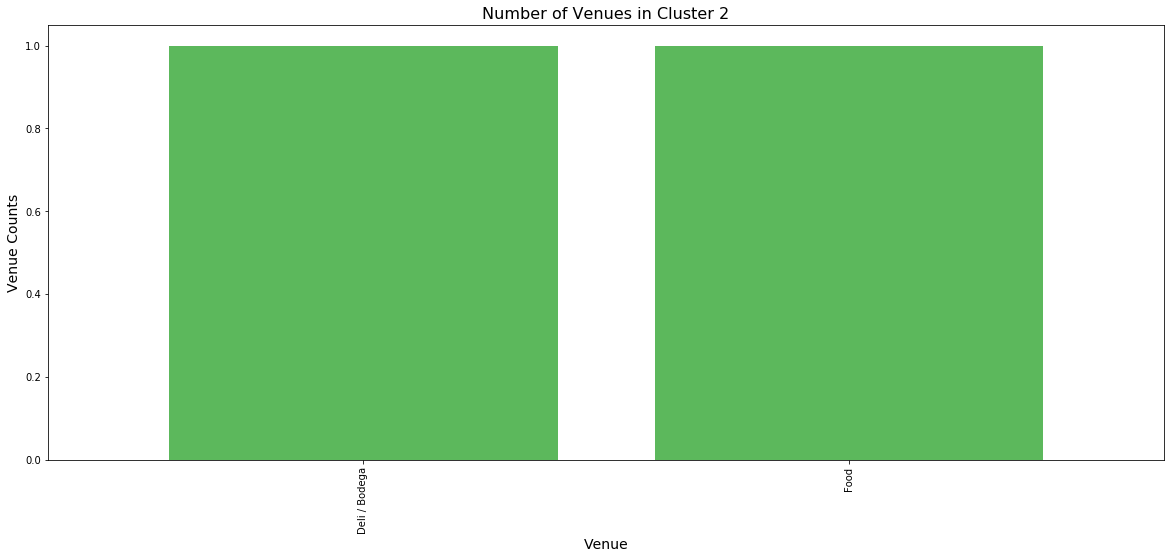

In [75]:
ax=Cluster2['1st Most Common Venue'].value_counts().plot(kind='bar', figsize=(20, 8), color=['#5cb85c'], width=width)

width=0.2

ax.set_title("Number of Venues in Cluster 2", fontsize=16)
ax.set_ylabel("Venue Counts", fontsize=14)
ax.set_xlabel("Venue", fontsize=14)

Since there are only a few different venue types, a pie chart would be a better choice of presentation.

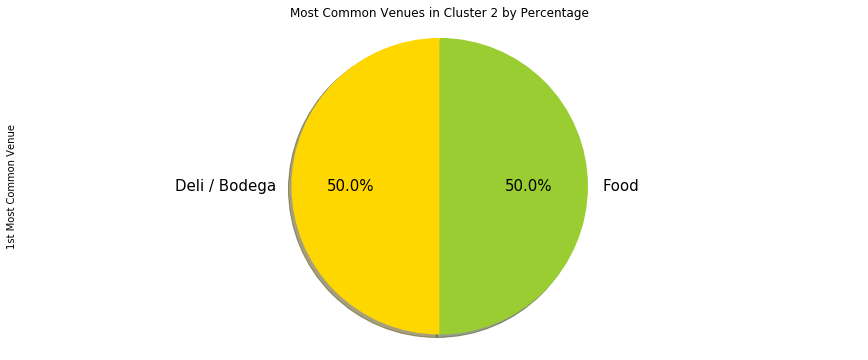

In [76]:
import matplotlib
import matplotlib.pyplot as plt

colors_list = ['gold', 'yellowgreen', 'lightcoral']

Cluster2['1st Most Common Venue'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow  
                            colors=colors_list,
                            fontsize=15)

plt.title('Most Common Venues in Cluster 2 by Percentage')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Cluster 2 is distinguished by deli and food.

### Cluster 3

In [77]:
Cluster3=candi_merged.loc[candi_merged['Cluster Labels'] == 2, candi_merged.columns[[1] + list(range(5, candi_merged.shape[1]))]]
Cluster3

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Rolling Hills Estates,Optical Shop,Garden,Hobby Shop,Scenic Lookout,Sandwich Place,Park,Business Service,Farm,Farmers Market,Yoga Studio


Text(0.5, 0, 'Venue')

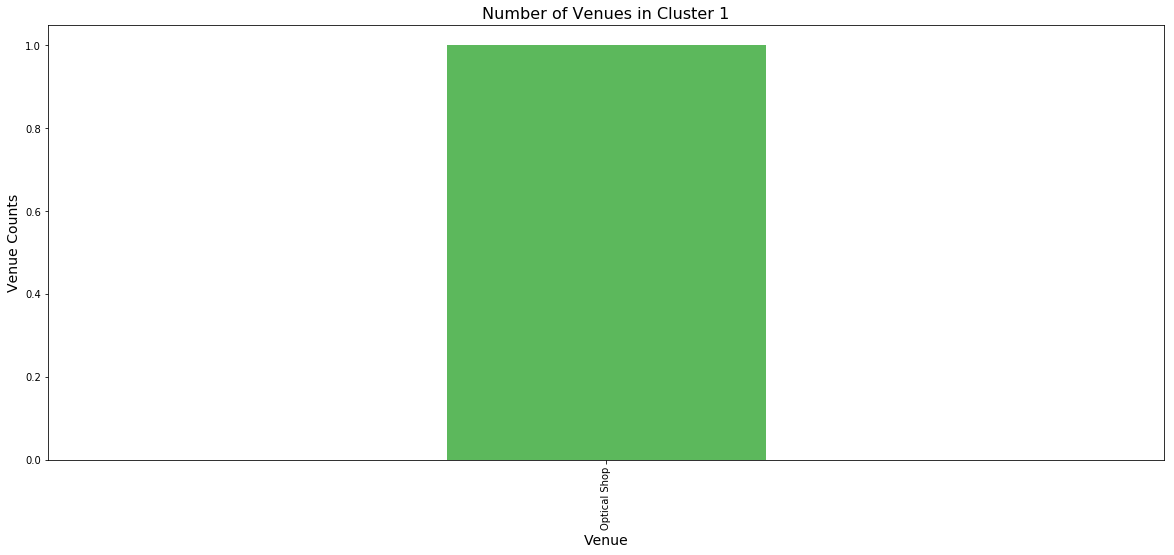

In [78]:
ax=Cluster3['1st Most Common Venue'].value_counts().plot(kind='bar', figsize=(20, 8), color=['#5cb85c'], width=width)

width=0.05

ax.set_title("Number of Venues in Cluster 1", fontsize=16)
ax.set_ylabel("Venue Counts", fontsize=14)
ax.set_xlabel("Venue", fontsize=14)

Since there is only 1 common venue in this cluster, a pie chart would be a better fit for its visualization.

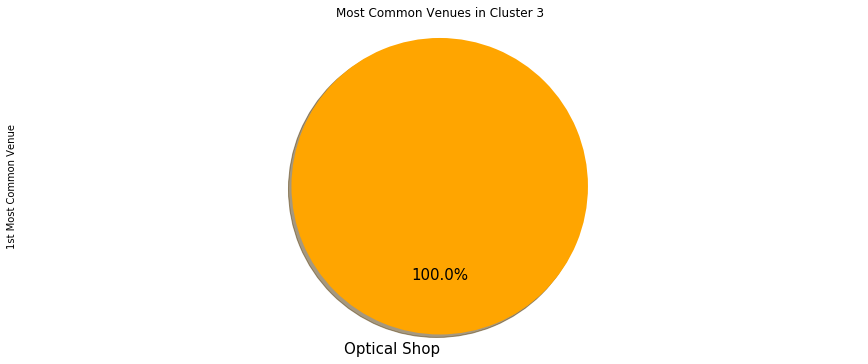

In [79]:
# autopct create %, start angle represent starting point
Cluster3['1st Most Common Venue'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            colors=['orange'],
                            fontsize=15)

plt.title('Most Common Venues in Cluster 3')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

Cluster 3 is distinguished by an optical shop.

### Cluster 1 and 2 can be defined by restaurants. To choose the most suitable cluster, a venue count comparison is shown below.

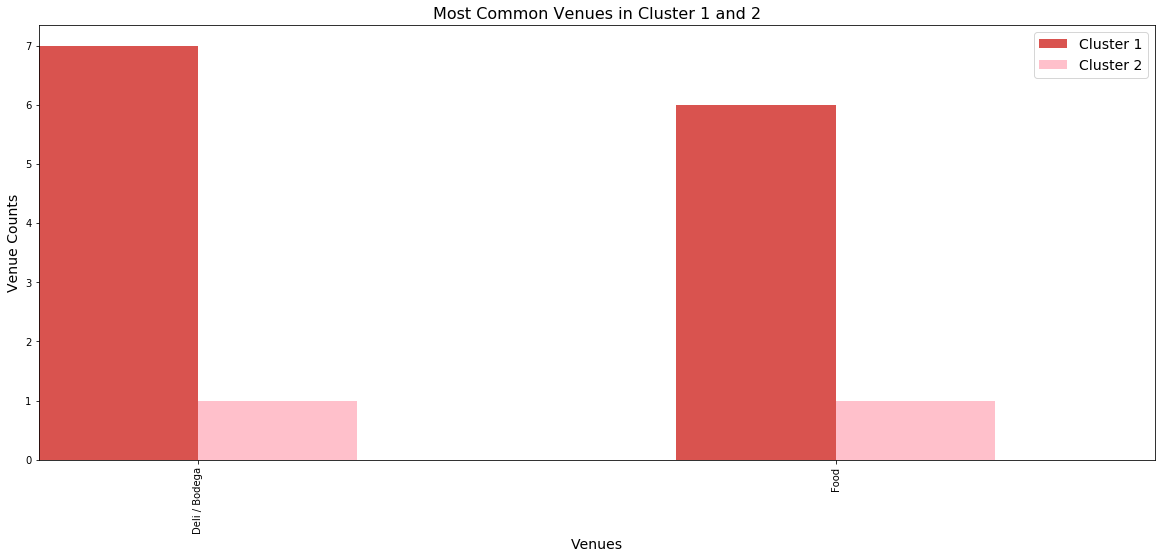

In [80]:
figsize=(20,8)
width=0.25

ax=Cluster1['1st Most Common Venue'].value_counts().plot(kind='bar', color=['#d9534f'], position=1, width=width, figsize=figsize, label='Cluster 1')
ax=Cluster2['1st Most Common Venue'].value_counts().plot(kind='bar', color=['pink'], position=0, width=width, figsize=figsize, label='Cluster 2')

ax.set_title('Most Common Venues in Cluster 1 and 2', fontsize=16)
ax.set_xlabel('Venues', fontsize=14)
ax.set_ylabel('Venue Counts', fontsize=14)
ax.legend(fontsize=14)

### Conclusion: Cluster 1 is the best choice for medical centers, followed by Cluster 2. Cluster 3 is NOT at all suitable.

### Cluster Map

This cluster map displays markers of cities from each cluster. Cluster 1 is displayed using red, Cluster 2 purple, and Cluster 3 green.

In [81]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(candi_merged['Latitude'], candi_merged['Longitude'], candi_merged['City'], candi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussions

After an extensive analysis and data utilization, the report shows that there are 58 candidate cities (shown in Cluster 1) that would be best suited for a medical center. These areas currently do NOT have a medical facility, and they contain quite a few number of restaurants.

While Cluster 2 has a high percentage of food places, compared to its other venues, the actual restaurant counts are still far fewer than Cluster 1. The comparison chart can be found in the Methodology section. 

Finally, Cluster 3 would not make a good candidate for a medical facility at all. However, it would make a good location for a hang-out spot and general rehabilitation, given there are scenic lookouts, hobby shops, and yoga studios. Unfortunately, that is not the focus of this report.

The most suitable 58 candidate cities, as can be seen in the Cluster Map, are spread out throughout the county. When looking at each city, their demographics and even the geographical aspects are strikingly different. For example, Rancho Parlos Verdes is located nearer to the coast and is a relatively wealthier area, where as Compton is situated in the 'downtown' area, and it has got a fair mix of residents from different socioeconomic statuses. 

Los Angeles is a huge and extremely diverse county. Therefore, if an entreprenuer wishes to narrow their candidate cities down to 1 or 2, he/she would have to consider many factors, such as the type of facility, the facility size, the target prices of treatments, and most importantly, the target patients. In other words, this report provides a good list and explanation of potential candidate cities for a medical facility; however, a more extensive research would still be needed to select the most suitable city for a medical center in Los Angeles County.

## Conclusion

The purpose of this report was to explore the cities within Los Angeles County that would be suitable for a medical facility. This report has successfully satisfied its purposes. The candidate cities were clustered, and the most common venues around each of those cities were identified through Foursquare API. However, since there are many factors that contribute to the success potentials of a big project like a medical facility, such as risk factors and target patients, the investor would have to consult many other specialists before deciding on choosing the best or most suitable city for his/her facility. 